In [1]:
import pandas as pd
%matplotlib inline
import gtab
import os
import matplotlib.pyplot as plt
import numpy as np
import math
from itertools import compress
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import os
import matplotlib
from scipy.stats import pearsonr

parentDirectory = os.path.abspath(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir))
DATA_DIR = parentDirectory +'/data/'
FIGURES_DIR = parentDirectory +'/figures/'

df_agg = pd.read_pickle(DATA_DIR + 'df_agg_modes.pickle')
df_mobility = pd.read_csv(DATA_DIR + 'df_mobility.csv')

linestyles = ['solid','dotted','dashed','dashdot','solid']

dict_queries =  [{'kg_id' : '/m/0p57p', 'name' : 'Recipe', 'type' : 'Mode 1'},
     {'kg_id' : '/m/0dv34', 'name' : 'Baking', 'type' : 'Mode 1'},
     {'kg_id' : '/m/01mtb', 'name' : 'Cooking', 'type' : 'Mode 1'},
     {'kg_id' : '/m/01jpn4', 'name' : 'Grocery store', 'type' : 'Mode 1'},
     {'kg_id' : '/m/0dnkv', 'name' : 'Supermarket', 'type' : 'Mode 1'},
     {'kg_id' : '/g/1224tf85', 'name' : 'Food delivery', 'type' : 'Mode 2'},
     {'kg_id' : '/m/01w53b', 'name' : 'Take-out', 'type' : 'Mode 2'},
     {'kg_id' : '/m/01t40w', 'name' : 'Drive-in', 'type' : 'Mode 2'},
     {'kg_id' : '/m/06l8d', 'name' : 'Restaurant', 'type' : 'Mode 3'},
     {'kg_id' : '/m/02pdnx', 'name' : 'Cafeteria', 'type' : 'Mode 3'},
     {'kg_id' : '/m/01nq30', 'name' : 'Diner', 'type' : 'Mode 3'},
     {'kg_id' : '/m/020fb2', 'name' : 'Cafe', 'type' : 'Mode 3'},
     {'kg_id' : '/m/01kt56', 'name' : 'Picnic', 'type' : 'Mode 4'},
     {'kg_id' : '/m/0983v', 'name' : 'Barbecue', 'type' : 'Mode 4'},
     {'kg_id' : '/m/052qxz', 'name' : 'Food festival', 'type' : 'Mode 3'},
     {'kg_id' : '/m/02lfqj', 'name' : 'Lunchbox', 'type' : 'Mode 4'}]

df_query = pd.DataFrame(dict_queries)

full_names = {
    'AU': 'Australia',
    'BR': 'Brazil',
    'CA': 'Canada',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'IT': 'Italy',
    'MX': 'Mexico',
    'ES': 'Spain',
    'GB': 'United Kingdom',
    'US': 'United States',
    'DK': 'Denmark',
    'KE': 'Kenya', 
    'NG': 'Nigeria',
    'JP': 'Japan',
    'SE': 'Sweden',
    'ID': 'Indonesia',
    'EG': 'Egypt'
}

event_dicts = [{'country': 'AU',
  'end_md_1': '2020-06-07',
  'start_md_1': '2020-03-27',
  'start_md_2': np.nan},
 {'country': 'BR',
  'end_md_1': '2020-08-09',
  'start_md_1': '2020-03-23',
  'start_md_2': np.nan},
 {'country': 'CA',
  'end_md_1': '2020-06-21',
  'start_md_1': '2020-03-19',
  'start_md_2': '2020-10-12'},
 {'country': 'DE',
  'end_md_1': '2020-05-09',
  'start_md_1': '2020-03-21',
  'start_md_2': '2020-12-18'},
 {'country': 'DK',
  'end_md_1': '2020-05-07',
  'start_md_1': '2020-03-17',
  'start_md_2': np.nan},
 {'country': 'EG',
  'end_md_1': '2020-07-01',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'ES',
  'end_md_1': '2020-06-14',
  'start_md_1': '2020-03-17',
  'start_md_2': '2020-11-07'},
 {'country': 'FR',
  'end_md_1': '2020-06-08',
  'start_md_1': '2020-03-18',
  'start_md_2': '2020-11-01'},
 {'country': 'GB',
  'end_md_1': '2020-08-03',
  'start_md_1': '2020-03-23',
  'start_md_2': '2020-10-21'},
 {'country': 'ID',
  'end_md_1': '2020-08-10',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'IN',
  'end_md_1': '2020-10-29',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'IT',
  'end_md_1': '2020-06-06',
  'start_md_1': '2020-03-11',
  'start_md_2': '2020-11-06'},
 {'country': 'JP',
  'end_md_1': '2020-05-30',
  'start_md_1': '2020-04-12',
  'start_md_2': np.nan},
 {'country': 'KE',
  'end_md_1': '2020-10-04',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'MX',
  'end_md_1': '2020-10-06',
  'start_md_1': '2020-03-25',
  'start_md_2': np.nan},
 {'country': 'NG',
  'end_md_1': '2020-08-09',
  'start_md_1': '2020-03-27',
  'start_md_2': np.nan},
 {'country': 'SE',
  'end_md_1': '2020-04-09',
  'start_md_1': '2020-04-03',
  'start_md_2': np.nan},
 {'country': 'US',
  'end_md_1': '2020-06-11',
  'start_md_1': '2020-03-21',
  'start_md_2': '2020-11-26'}]
dict_annotate = {'Mode 1': 'Recipe, cooking, baking, grocery store, supermarket',
                 'Mode 2': 'Food delivery, take-out, drive-in', 
                 'Mode 3': 'Restaurant, careteria, cafe, diner, food festival', 
                 'Mode 4': 'Picnic, barbecue, lunchbox'}

def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

## z-scores

In [2]:
dict_annotate = {'Mode 1': 'Recipe, cooking, baking, grocery store, supermarket\n(prepared within the household, consumed at home)',
                 'Mode 2': 'Food delivery, take-out, drive-in\n(prepared by third party, consumed at home)', 
                 'Mode 3': 'Restaurant, careteria, cafe, diner, food festival\n(prepared by third party, consumed outside)', 
                 'Mode 4': 'Picnic, barbecue, lunchbox\n(prepared within the household, consumed outside)'}


In [3]:
df_agg['full_name'] = df_agg['country'].apply(lambda x: full_names[x])

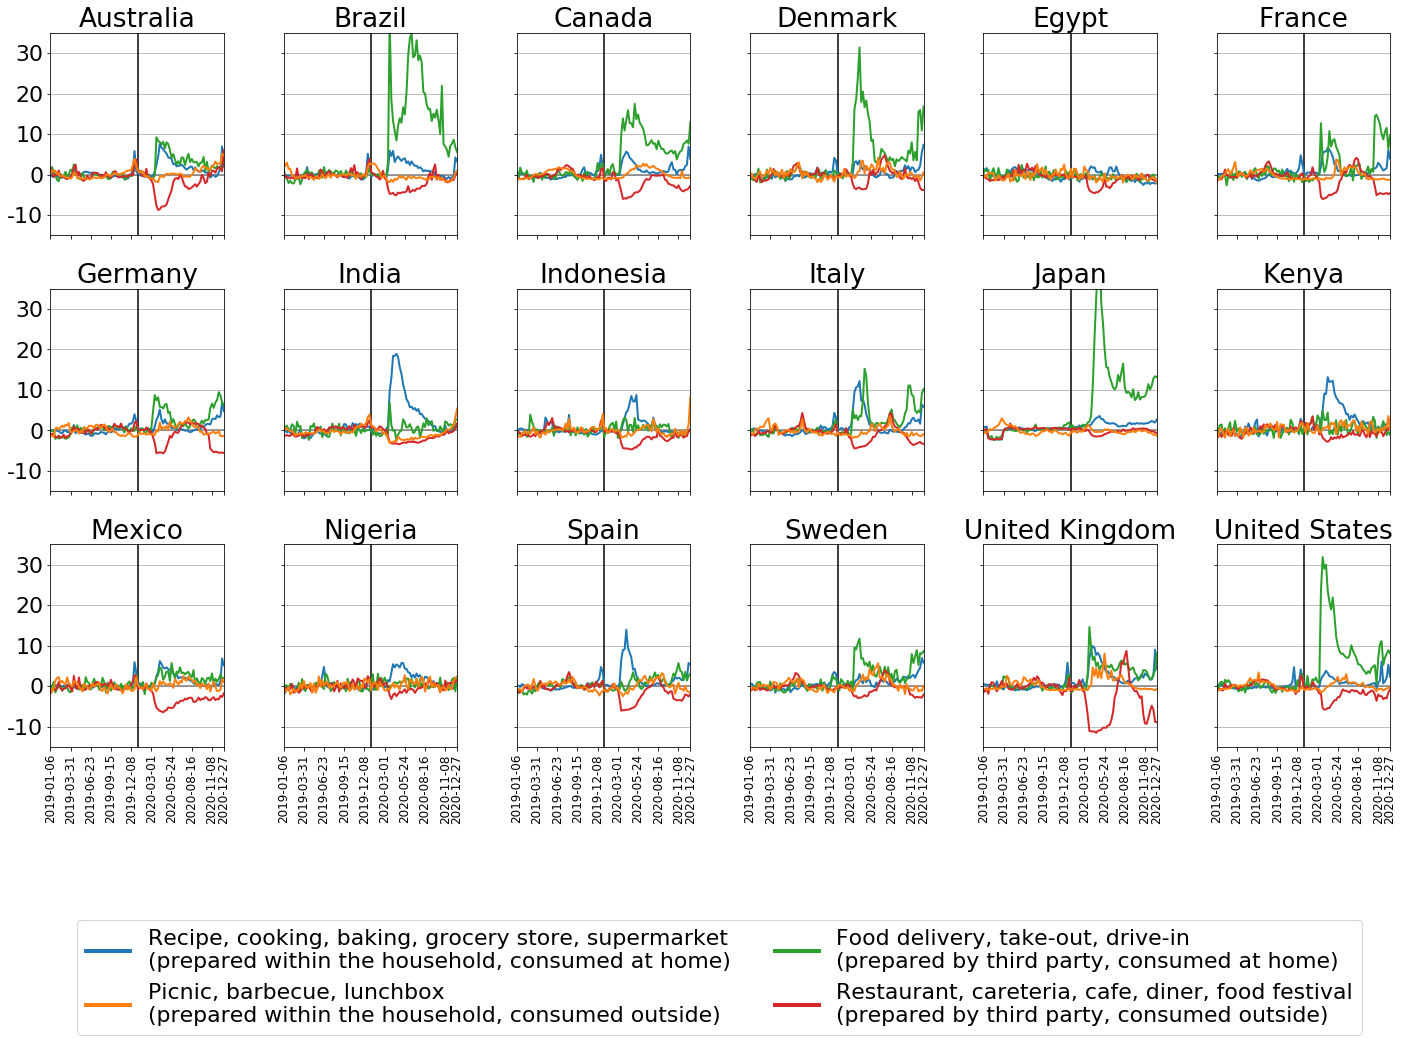

In [4]:
matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(3,6, figsize= (20,12), sharex = True, sharey = True)

cnt = 0

sc = []

colors = ['tab:blue','tab:green','tab:red', 'tab:orange']
for name in sorted(list(full_names.values())):
    
    sbplt = ax[math.floor(cnt/6), cnt%6]
    
    for n,gr in df_agg.loc[df_agg['full_name'] == name].groupby('category'):
        
        mean_2019 = gr.iloc[0]['volume_weekly_total'].values[:52].mean()
        std_2019 = gr.iloc[0]['volume_weekly_total'].values[:52].std()
        
        y = ((gr.iloc[0]['volume_weekly_total'].values - mean_2019) / std_2019)
        #y = pd.DataFrame(y).rolling(3, min_periods=1).mean()
        sbplt.plot(gr.iloc[0]['volume_weekly_total'].index, y ,
             linewidth = 2,
                 label = dict_annotate[n],
                 color = colors[int(n[-1])-1])
    
    

    
        
        sc.append(Line2D([0], [0], label= dict_annotate[n], linewidth = 4, color = colors[int(n[-1])-1]))

    
    sbplt.set_xticks(np.concatenate((gr.iloc[0]['volume_weekly_total'].index[::12],
                                     [gr.iloc[0]['volume_weekly_total'].index[-1]])))
    sbplt.set_xticklabels(np.concatenate((gr.iloc[0]['volume_weekly_total'].index[::12],
                                     [gr.iloc[0]['volume_weekly_total'].index[-1]])), rotation = 90, size= 12)

    
    gr = df_mobility.loc[df_mobility['country_region_code'] == name]
    
    x = gr['date'].values[1:316]
    y = gr['residential_percent_change_from_baseline'].values[1:316]
    y = pd.DataFrame(y).rolling(7, min_periods=1).mean()


    cnt +=1
    sbplt.set_title(name)
    
    sbplt.hlines(0,0,104, color = 'gray')
    sbplt.grid(axis='y')
    
    #sbplt.set_yscale('symlog', basey = 10)
    
    sbplt.set_yticks([-10,0,10,20,30])
    sbplt.set_yticklabels([-10,0,10,20,30]) 
    
    sbplt.set_ylim([-15,35])
    sbplt.set_xlim([0,103])

    sbplt.vlines(52,-15,35, color = 'black')
    #sbplt.vlines(0,-15,35, color = 'black')
    #sbplt.vlines(103,-15,35, color = 'black')
#fig.suptitle('Mode entities interest volume (z-scores), 2019-2020.', y = 1.05)
plt.tight_layout()

sbplt.legend(bbox_to_anchor = (-0.2,-1), fontsize= 25)

plt.legend(handles=[sc[0],sc[3],sc[1],sc[2]], bbox_to_anchor= (0.9,-0.8), ncol = 2)


plt.savefig(FIGURES_DIR + 'modes_z_scores.pdf', bbox_inches='tight')

In [5]:
avg_peak = []
avg_total = []

cnt = 0

sc = []


for name in sorted(list(full_names.keys())):
    if name in ['IN','JP','ID','NG','EG']:
        continue
    for n,gr in df_agg.loc[df_agg['country'] == name].groupby('category'):
        if n == 'Mode 1':
            mean_2019 = gr.iloc[0]['volume_weekly_total'].values[:52].mean()
            std_2019 = gr.iloc[0]['volume_weekly_total'].values[:52].std()

            y = ((gr.iloc[0]['volume_weekly_total'].values - mean_2019) / std_2019)
            
            avg_peak.append(max((y)[52:(52+26)]) / (y)[50])
            avg_total.append(sum((y)[52:(52+26)]) / (y)[50])
            print(name)
            print(y[50])
            #y = pd.DataFrame(y).rolling(3, min_periods=1).mean()


AU
5.830631243744576
BR
5.1682432091917985
CA
4.904114673311383
DE
4.000019672488593
DK
4.163047633677262
ES
4.7154600538971865
FR
4.813722240820099
GB
5.778875257800357
IT
4.343916876924694
KE
2.8538178974639594
MX
5.9104504768396975
SE
3.4921881672466224
US
4.157395831267927


In [6]:
print(round(np.mean(avg_peak),1))
print(round(np.mean(avg_total),1))

1.7
13.7


In [7]:
studied_weeks = list(df_agg.iloc[0]['volume_weekly_total'].index)[-46:]

In [8]:
mobility_ts = {}

for country, gr in df_mobility.groupby('country_region_code'):
    mobility_dict = {}
    gr = gr.iloc[1:323]
    for i in chunker(gr,7):
        mobility_dict[i.iloc[0]['date']] = (i['residential_percent_change_from_baseline'].mean())
    mobility_ts[country] = mobility_dict

In [9]:
df_events = pd.DataFrame(event_dicts)
df_events['start_md_1'] = pd.to_datetime(df_events['start_md_1'])
df_events['end_md_1'] = pd.to_datetime(df_events['end_md_1'])
df_events['start_md_2'] = pd.to_datetime(df_events['start_md_2'])

In [10]:
entry_list_first_wave = []
entry_list_second_wave = []

for category, gr1 in df_agg.groupby('category'):
    
    #print(category)
    for country, gr2 in gr1.groupby('country'):
        entry = {}
        #print(country)
        
        x = gr2['volume_weekly_total'].values[0][-46:]
        y = mobility_ts[country]

        mask = (pd.to_datetime(x.index)<=df_events.loc[df_events['country']==country]['end_md_1'].iloc[0])

        x = x.loc[mask]
        y = list(compress(list(y.values()),mask))
        
        #print(pearsonr(x.values, y))

        entry['category'] = category
        entry['corr'] = pearsonr(x.values, y)[0]
        entry['p'] = pearsonr(x.values, y)[1]
        
        entry['country'] = country
        
        entry_list_first_wave.append(entry.copy())
        
        
    
        x = gr2['volume_weekly_total'].values[0][-46:]
        y = mobility_ts[country]

        mask = (pd.to_datetime(x.index)>df_events.loc[df_events['country']==country]['end_md_1'].iloc[0])
        
        x = x.loc[mask]
        y = list(compress(list(y.values()),mask))
        
        entry['corr'] = pearsonr(x.values, y)[0]
        entry['p'] = pearsonr(x.values, y)[1]
        
        entry_list_second_wave.append(entry)


df_plot_w_1 = pd.DataFrame(entry_list_first_wave)
df_plot_w_2 = pd.DataFrame(entry_list_second_wave)


In [11]:
df_plot_w_1['wave'] = ['First wave']*len(df_plot_w_1)
df_plot_w_2['wave'] = ['Second wave']*len(df_plot_w_2)

order = list(df_plot_w_1.groupby('category').agg('median').sort_values(by = 'corr').index[::-1])

temp_df1 = pd.DataFrame({'category': order, 
                        'category_id':2*np.array(range(len(order)))})
temp_df2 = pd.DataFrame({'category': order, 
                        'category_id':2*np.array(range(len(order)))+1})

df_plot_w_1_a = df_plot_w_1.merge(temp_df1, on='category', how='left')
df_plot_w_2_a = df_plot_w_2.merge(temp_df2, on='category', how='left')

df_plot_w_1_a['category_id'] = df_plot_w_1_a['category_id'].astype(int)
df_plot_w_2_a['category_id'] = df_plot_w_2_a['category_id'].astype(int)

In [12]:
dict_annotate = {'Mode 1': 'recipe, cooking, baking, grocery store, supermarket',
                 'Mode 2': 'food delivery, take-out, drive-in', 
                 'Mode 3': 'restaurant, careteria, cafe, diner, food festival', 
                 'Mode 4': 'picnic, barbecue, lunchbox'}

In [13]:
entry_list_first_wave = []


for category, gr1 in df_agg.groupby('category'):
    
    #print(category)
    for country, gr2 in gr1.groupby('country'):
        entry = {}
        #print(country)
        
        x = (gr2['volume_weekly_total'].values[0][-46:].values - gr2['volume_weekly_total'].values[0][-98:-52].values)/gr2['volume_weekly_total'].values[0][-98:-52].values
        y = mobility_ts[country]

        
        
        entry['category'] = category
        entry['corr'] = spearmanr(x, list(y.values()))[0]
        entry['p'] = spearmanr(x, list(y.values()))[1]
        
        entry['country'] = country
        
        entry_list_first_wave.append(entry.copy())
        

df_plot_w_1 = pd.DataFrame(entry_list_first_wave)


df_plot_w_1['wave'] = ['First wave']*len(df_plot_w_1)

order = list(df_plot_w_1.groupby('category').agg('mean').sort_values(by = 'corr').index[::-1])

temp_df1 = pd.DataFrame({'category': order, 
                        'category_id':2*np.array(range(len(order)))})

df_plot_w_1_a = df_plot_w_1.merge(temp_df1, on='category', how='left')

df_plot_w_1_a['category_id'] = df_plot_w_1_a['category_id'].astype(int)

dict_annotate = {'Mode 1': 'recipe, cooking, baking, grocery store, supermarket',
                 'Mode 2': 'food delivery, take-out, drive-in', 
                 'Mode 3': 'restaurant, careteria, cafe, diner, food festival', 
                 'Mode 4': 'picnic, barbecue, lunchbox'}

/Users/gligoric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [14]:
df_plot_w_1_a.loc[df_plot_w_1_a['category']=='Mode 3'].sort_values(by='corr')

,category,corr,p,country,wave,category_id
47,Mode 3,-0.968790,2.739077e-28,IT,First wave,6
38,Mode 3,-0.943346,1.049683e-22,CA,First wave,6
39,Mode 3,-0.903140,9.191552e-18,DE,First wave,6
42,Mode 3,-0.881391,6.295001e-16,ES,First wave,6
44,Mode 3,-0.874310,2.090986e-15,GB,First wave,6
41,Mode 3,-0.857724,2.676212e-14,EG,First wave,6
50,Mode 3,-0.843525,1.862060e-13,MX,First wave,6
37,Mode 3,-0.830979,8.866415e-13,BR,First wave,6
45,Mode 3,-0.821076,2.785038e-12,ID,First wave,6
43,Mode 3,-0.811573,7.834985e-12,FR,First wave,6


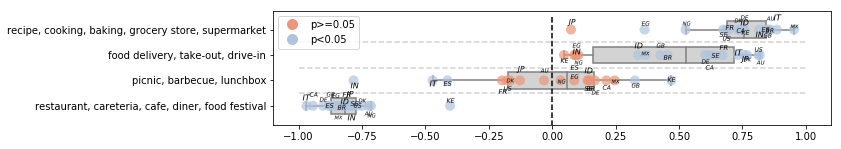

In [15]:
df_plot_w_1_a['p<0.05'] = df_plot_w_1_a['p'].apply(lambda x: 'p<0.05' if x <0.05 else 'p>=0.05')
df_plot_w_2_a['p<0.05'] = df_plot_w_2_a['p'].apply(lambda x: 'p<0.05' if x <0.05 else 'p>=0.05')

matplotlib.rcParams.update({'font.size': 10})

f, ax = plt.subplots(figsize=(10,2.1))


sns.boxplot(x="corr", y="category_id", data=df_plot_w_1_a, orient = 'h',  width = 1.3,
            color = 'lightgray', order=np.arange(2*29), showfliers=False)

red_patch = mpatches.Patch(color='darksalmon', label='First wave')
blue_patch = mpatches.Patch(color='lightsteelblue', label='Second wave')


sc1 = Line2D([0], [0], marker='o', color='darksalmon', label='p>=0.05', linestyle = 'None',
                          markerfacecolor='darksalmon', markersize=10)
sc2 = Line2D([0], [0], marker='o', color='lightsteelblue', label='p<0.05', linestyle = 'None',
                          markerfacecolor='lightsteelblue', markersize=10)


sns.stripplot(x="corr", y="category_id", hue = 'p<0.05',data=df_plot_w_1_a, orient = 'h',
            size = 10, marker = 'o',edgecolor='gray',alpha = 0.7,palette=['lightsteelblue','darksalmon'], order=np.arange(2*29), jitter = 0)

#'darkseagreen','sandybrown'
for n,gr in df_plot_w_1_a.groupby('country'):
    sns.stripplot(x="corr", y="category_id", hue = 'p<0.05',data=gr, orient = 'h', jitter =1.01,
            size = 8, marker = '$'+ n +'$',palette=['black','black'], order=np.arange(2*29))

plt.legend(handles=[sc1, sc2], loc = 'upper left', #bbox_to_anchor = (0,1)
          )



for i in range(1,6)[::2]:
    plt.hlines(i,-1,1,linestyle ='--',color = 'lightgray')
            
             #width=0.5

plt.yticks(np.arange(2*29)[::2], [dict_annotate[i] for i in order]);
plt.ylim([4*2-0.5, -1.5])
plt.vlines(0,-1,56, linestyle = '--',color = 'black')
plt.ylabel('')
plt.xlabel("");


plt.savefig(FIGURES_DIR + "two_waves_corr_modes.pdf", bbox_inches='tight')


In [16]:
entry_list_first_wave = []


for category, gr1 in df_agg.groupby('category'):
    
    #print(category)
    for country, gr2 in gr1.groupby('country'):
        entry = {}
        #print(country)
        
        x = (gr2['volume_weekly_total'].values[0][-46:].values - gr2['volume_weekly_total'].values[0][-98:-52].values)/gr2['volume_weekly_total'].values[0][-98:-52].values
        y = mobility_ts[country]


        entry['category'] = category
        entry['corr'] = pearsonr(x, list(y.values()))[0]
        entry['p'] = pearsonr(x, list(y.values()))[1]
        
        entry['country'] = country
        
        entry_list_first_wave.append(entry.copy())
        

df_plot_w_1 = pd.DataFrame(entry_list_first_wave)


df_plot_w_1['wave'] = ['First wave']*len(df_plot_w_1)

order = list(df_plot_w_1.groupby('category').agg('mean').sort_values(by = 'corr').index[::-1])

temp_df1 = pd.DataFrame({'category': order, 
                        'category_id':2*np.array(range(len(order)))})

df_plot_w_1_a = df_plot_w_1.merge(temp_df1, on='category', how='left')

df_plot_w_1_a['category_id'] = df_plot_w_1_a['category_id'].astype(int)

dict_annotate = {'Mode 1': 'recipe, cooking, baking, grocery store, supermarket',
                 'Mode 2': 'food delivery, take-out, drive-in', 
                 'Mode 3': 'restaurant, careteria, cafe, diner, food festival', 
                 'Mode 4': 'picnic, barbecue, lunchbox'}

/Users/gligoric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/gligoric/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3007: RuntimeWarning: invalid value encountered in subtract
  xm, ym = x - mx, y - my
/Users/gligoric/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3008: RuntimeWarning: invalid value encountered in reduce
  r_num = np.add.reduce(xm * ym)


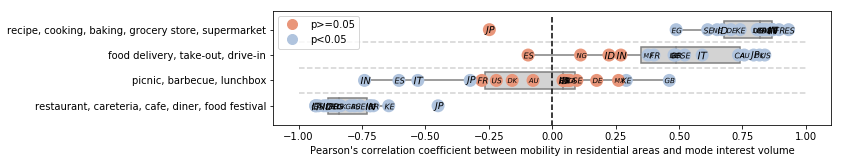

In [17]:
df_plot_w_1_a['p<0.05'] = df_plot_w_1_a['p'].apply(lambda x: 'p<0.05' if x <0.05 else 'p>=0.05')
df_plot_w_2_a['p<0.05'] = df_plot_w_2_a['p'].apply(lambda x: 'p<0.05' if x <0.05 else 'p>=0.05')

matplotlib.rcParams.update({'font.size': 10})

f, ax = plt.subplots(figsize=(10,2.1))


sns.boxplot(x="corr", y="category_id", data=df_plot_w_1_a, orient = 'h',  width = 1.3,
            color = 'lightgray', order=np.arange(2*29), showfliers=False)

red_patch = mpatches.Patch(color='darksalmon', label='First wave')
blue_patch = mpatches.Patch(color='lightsteelblue', label='Second wave')


sc1 = Line2D([0], [0], marker='o', color='darksalmon', label='p>=0.05', linestyle = 'None',
                          markerfacecolor='darksalmon', markersize=10)
sc2 = Line2D([0], [0], marker='o', color='lightsteelblue', label='p<0.05', linestyle = 'None',
                          markerfacecolor='lightsteelblue', markersize=10)


sns.stripplot(x="corr", y="category_id", hue = 'p<0.05',data=df_plot_w_1_a, orient = 'h',
            size = 13, marker = 'o',palette=['lightsteelblue','darksalmon'], order=np.arange(2*29), jitter = 0)

#'darkseagreen','sandybrown'
for n,gr in df_plot_w_1_a.groupby('country'):
    sns.stripplot(x="corr", y="category_id", hue = 'p<0.05',data=gr, orient = 'h',
            size = 10, marker = '$'+ n +'$',palette=['black','black'], order=np.arange(2*29), jitter = 0)

plt.legend(handles=[sc1, sc2], loc = 'upper left', #bbox_to_anchor = (0,1)
          )



for i in range(1,6)[::2]:
    plt.hlines(i,-1,1,linestyle ='--',color = 'lightgray')
            
             #width=0.5

plt.yticks(np.arange(2*29)[::2], [dict_annotate[i] for i in order]);
plt.ylim([4*2-0.5, -1.5])
plt.vlines(0,-1,56, linestyle = '--',color = 'black')
plt.ylabel('')
plt.xlabel("Pearson's correlation coefficient between mobility in residential areas and mode interest volume");


plt.savefig(FIGURES_DIR + "appendix_pearson_corr_modes.pdf", bbox_inches='tight')